# 1) 1/M orthogonal signals

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

def generate_orthogonal_signals(M, N):
    signals = np.random.normal(size=(M, N))
    orthogonal_signals = np.zeros((M, N))
    
    for i in range(M):
        orthogonal_signals[i] = signals[i]
        for j in range(i):
            orthogonal_signals[i] -= np.dot(orthogonal_signals[j], signals[i]) / np.dot(orthogonal_signals[j], orthogonal_signals[j]) * orthogonal_signals[j]
        
        # Normalize the signal
        orthogonal_signals[i] /= np.linalg.norm(orthogonal_signals[i])
    
    return orthogonal_signals

def calcPdPfa(data):
    h1s = data[data[:,1] == 1].shape[0]
    h0s = data[data[:,1] == 0].shape[0]

    currh1 = h1s
    currh0 = h0s

    pd = [1]
    pfa = [1]
    for i in data:
        if i[1] == 1:
            currh1 -= 1
        elif i[1] == 0:
            currh0 -= 1
        pd.append(currh1/h1s)
        pfa.append(currh0/h0s)
    pd.append(0)
    pfa.append(0)
    return pd,pfa  


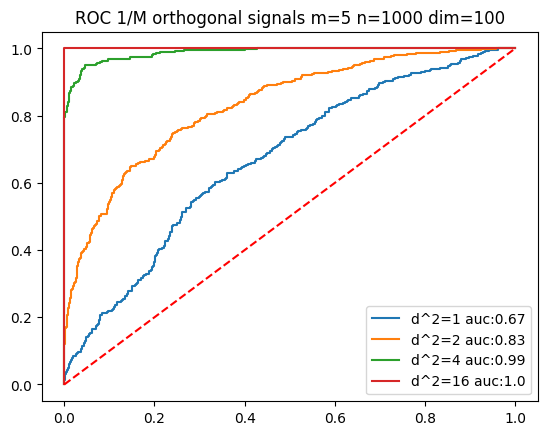

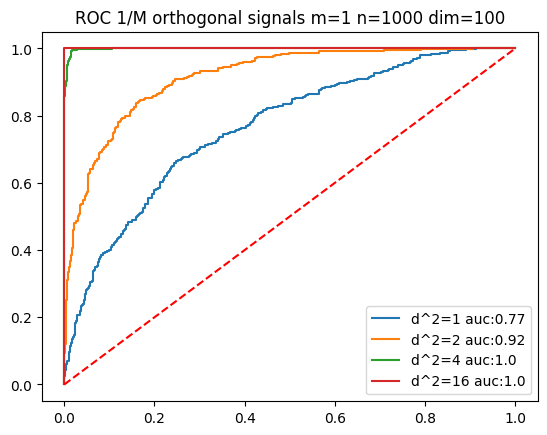

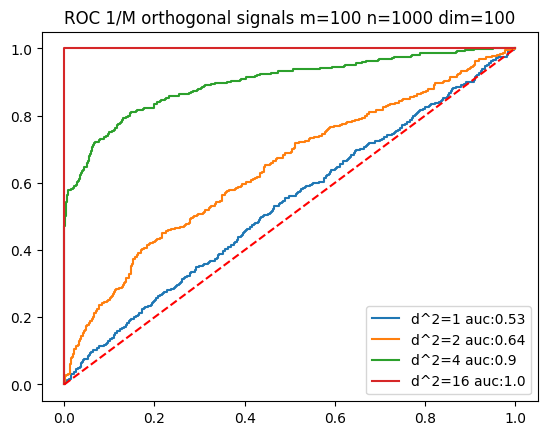

In [65]:
np.random.seed(seed=0)
M = [5,1,100]
d2 = [1,2,4,16]
E = 1
signalDim = 100
n = 1000

def filter_1_M(x, noise_variance, m_orthogonal_signals):
    prodSum = E/noise_variance * (x @ m_orthogonal_signals.T)
    # print("prodsum",prodSum)
    exp = np.exp(prodSum)
    # print("exp",exp)
    lambdaa = (1/m) * np.sum(exp, axis=1) 
    # print("lambda",lambdaa)
    return lambdaa

for m in M:
    fig, ax = plt.subplots()
    for d in d2:
        noise_variance = E/d        
        m_orthogonal_signals = generate_orthogonal_signals(m, signalDim)
        rand_m = np.random.choice(m, n//2)
        

        h1 = m_orthogonal_signals[rand_m] + np.random.normal(0, noise_variance, size=(n//2, signalDim))
        h0 = np.random.normal(0, noise_variance, size=(n//2, signalDim))
        decisionStats = np.ndarray((n,2))

        decisionStats[n//2:,0] = filter_1_M(h0, noise_variance, m_orthogonal_signals)
        decisionStats[n//2:,1] = 0
        decisionStats[:n//2,0] = filter_1_M(h1, noise_variance, m_orthogonal_signals)
        decisionStats[:n//2,1] = 1
        
        decisionStats = decisionStats[decisionStats[:, 0].argsort()]
        pd,pfa = calcPdPfa(decisionStats)
        auc = metrics.auc(pfa,pd)
        ax.plot(pfa,pd, label=f"d^2={d} auc:{round(auc,2)}") 
        ax.legend()
        ax.set_title(f"ROC 1/M orthogonal signals m={m} n={n} dim={signalDim}")
    ax.plot([0, 1], [0, 1],'r--')
    plt.show()



# 2) SKEP

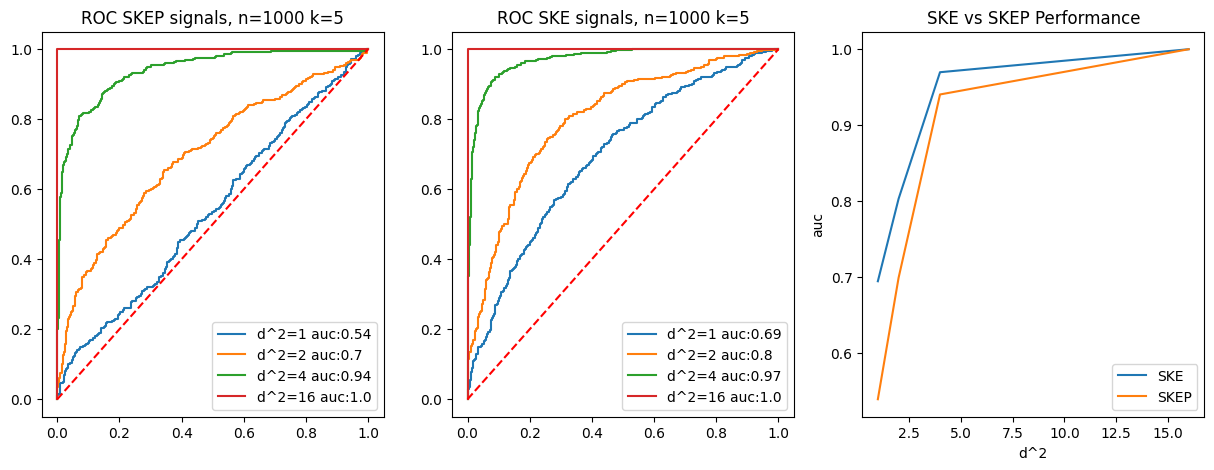

In [101]:
np.random.seed(seed=0)

d2 = [1,2,4,16]
E = 1
amp = 1
freq = 10
k=5
n = 1000

unknownPhase = np.random.uniform(0, 2*np.pi)
t = np.linspace(0, 2 * np.pi, k)
signal = amp * np.sin(freq * t + unknownPhase)

fig, ax = plt.subplots(1,3,figsize=(15,5))

SKEP = []
for d in d2:
    noise_variance = E/d

    h1 = signal + np.random.normal(0, noise_variance, size=(n//2, k))
    h0 = np.random.normal(0, noise_variance, size=(n//2, k))
    decisionStats = np.ndarray((n,2))

    decisionStats[:n//2,0] = np.power(np.sum(h1*amp*np.cos(freq * t), axis=1),2) + np.power(np.sum(h1*amp*np.sin(freq * t), axis=1),2)
    decisionStats[:n//2,1] = 1

    decisionStats[n//2:,0] = np.power(np.sum(h0*amp*np.cos(freq * t), axis=1),2) + np.power(np.sum(h0*amp*np.sin(freq * t), axis=1),2)
    decisionStats[n//2:,1] = 0

    decisionStats = decisionStats[decisionStats[:, 0].argsort()]

    pd,pfa = calcPdPfa(decisionStats)
    auc = metrics.auc(pfa,pd)

    ax[0].plot(pfa,pd, label=f"d^2={d} auc:{round(auc,2)}") 
    ax[0].set_title(f"ROC SKEP signals, n={n} k={k}")
    SKEP.append(auc)

SKE = []
for d in d2:
    noise_variance = E/d

    h1 = signal + np.random.normal(0, noise_variance, size=(n//2, k))
    h0 = np.random.normal(0, noise_variance, size=(n//2, k))
    decisionStats = np.ndarray((n,2))

    decisionStats[:n//2,0] = h1 @ signal.T
    decisionStats[:n//2,1] = 1

    decisionStats[n//2:,0] = h0 @ signal.T
    decisionStats[n//2:,1] = 0

    decisionStats = decisionStats[decisionStats[:, 0].argsort()]

    pd,pfa = calcPdPfa(decisionStats)
    auc = metrics.auc(pfa,pd)

    ax[1].plot(pfa,pd, label=f"d^2={d} auc:{round(auc,2)}") 
    ax[1].set_title(f"ROC SKE signals, n={n} k={k}")
    SKE.append(auc)

ax[0].legend()
ax[1].legend()
ax[0].plot([0, 1], [0, 1],'r--')
ax[1].plot([0, 1], [0, 1],'r--')

ax[2].plot(d2, SKE, label="SKE")
ax[2].plot(d2, SKEP, label="SKEP")
ax[2].set_xlabel("d^2")
ax[2].set_ylabel("auc")
ax[2].set_title("SKE vs SKEP Performance")
ax[2].legend()
plt.show()


# 3) SKEA

In [ ]:
np.random.seed(seed=0)

d2 = [1,2,4,16]
E = 1

amp = 1
freq = 10
# k = 360
k=5
n = 1000



unknownPhase = np.random.uniform(0, 2*np.pi)
t = np.linspace(0, 2 * np.pi, k)
signal = amp * np.sin(freq * t + unknownPhase)

fig, ax = plt.subplots()
for d in d2:
    noise_variance = E/d

    h1 = signal + np.random.normal(0, noise_variance, size=(n//2, k))
    h0 = np.random.normal(0, noise_variance, size=(n//2, k))
    decisionStats = np.ndarray((n,2))

    # integrate from 0 to 2pi of cos^2
    # S: integrated over 2pi S*S
    # N: integrated over 2pi: N*S
    decisionStats[:n//2,0] = np.power(np.sum(h1*amp*np.cos(freq * t), axis=1),2) + np.power(np.sum(h1*amp*np.sin(freq * t), axis=1),2)
    decisionStats[:n//2,1] = 1

    decisionStats[n//2:,0] = np.power(np.sum(h0*amp*np.cos(freq * t), axis=1),2) + np.power(np.sum(h0*amp*np.sin(freq * t), axis=1),2)
    decisionStats[n//2:,1] = 0

    decisionStats = decisionStats[decisionStats[:, 0].argsort()]

    pd,pfa = calcPdPfa(decisionStats)
    auc = metrics.auc(pfa,pd)

    ax.plot(pfa,pd, label=f"d^2={d} auc:{round(auc,2)}") 
    
ax.legend()
ax.set_title(f"ROC SKEP signals, n={n} k={k}")
ax.plot([0, 1], [0, 1],'r--')
plt.show()